# House Prices - Advanced Regression Techniques
#### Predict sales prices and practice feature engineering, RFs, and gradient boosting

http://localhost:8888/tree/notebook

# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')
sns.set()

# Importando dados

In [2]:
dir_path = '../data/input/'
train_file = 'train.csv'
test_file = 'test.csv'

In [3]:
df_train = pd.read_csv(dir_path + train_file, index_col = 'Id')
df_test = pd.read_csv(dir_path + test_file, index_col = 'Id')

In [4]:
print(f'Dados de treino: {df_train.shape}')
print(f'Dados de teste: {df_test.shape}')

Dados de treino: (1460, 80)
Dados de teste: (1459, 79)


# Juntar dados de treino e teste

In [5]:
sales_price = df_train.SalePrice

In [6]:
#df_train.drop('SalePrice', axis=1, inplace=True)

In [7]:
df_all = pd.concat([df_train, df_test])

In [8]:
indice_train_max = df_train.index.max()

In [9]:
print(f'Dados totais: {df_all.shape}')

Dados totais: (2919, 80)


# Visualizando os dados

In [10]:
df_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [11]:
df_all.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [12]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# Tratamento de dados nulos

In [13]:
for feature in df_all.columns:
    if df_all[feature].isna().sum():
        print(f'{feature} - {df_all[feature].isna().sum()}')

MSZoning - 4
LotFrontage - 486
Alley - 2721
Utilities - 2
Exterior1st - 1
Exterior2nd - 1
MasVnrType - 24
MasVnrArea - 23
BsmtQual - 81
BsmtCond - 82
BsmtExposure - 82
BsmtFinType1 - 79
BsmtFinSF1 - 1
BsmtFinType2 - 80
BsmtFinSF2 - 1
BsmtUnfSF - 1
TotalBsmtSF - 1
Electrical - 1
BsmtFullBath - 2
BsmtHalfBath - 2
KitchenQual - 1
Functional - 2
FireplaceQu - 1420
GarageType - 157
GarageYrBlt - 159
GarageFinish - 159
GarageCars - 1
GarageArea - 1
GarageQual - 159
GarageCond - 159
PoolQC - 2909
Fence - 2348
MiscFeature - 2814
SaleType - 1
SalePrice - 1459


### Tratar features com poucos valores nulos

In [14]:
for feature in df_all.columns:
    if 1 <= df_all[feature].isna().sum() <= 4:
        preencher = df_all[feature].value_counts().index[0]
        print(f'{feature} - {df_all[feature].isna().sum()} - {preencher}')
        df_all[feature].fillna(preencher, inplace=True)

MSZoning - 4 - RL
Utilities - 2 - AllPub
Exterior1st - 1 - VinylSd
Exterior2nd - 1 - VinylSd
BsmtFinSF1 - 1 - 0.0
BsmtFinSF2 - 1 - 0.0
BsmtUnfSF - 1 - 0.0
TotalBsmtSF - 1 - 0.0
Electrical - 1 - SBrkr
BsmtFullBath - 2 - 0.0
BsmtHalfBath - 2 - 0.0
KitchenQual - 1 - TA
Functional - 2 - Typ
GarageCars - 1 - 2.0
GarageArea - 1 - 0.0
SaleType - 1 - WD


### Tratar demais features com valores nulos

In [15]:
for feature in df_all.columns:
    if df_all[feature].isna().sum():
        print(f'{feature} - {df_all[feature].isna().sum()}')

LotFrontage - 486
Alley - 2721
MasVnrType - 24
MasVnrArea - 23
BsmtQual - 81
BsmtCond - 82
BsmtExposure - 82
BsmtFinType1 - 79
BsmtFinType2 - 80
FireplaceQu - 1420
GarageType - 157
GarageYrBlt - 159
GarageFinish - 159
GarageQual - 159
GarageCond - 159
PoolQC - 2909
Fence - 2348
MiscFeature - 2814
SalePrice - 1459


In [16]:
df_all.LotFrontage.fillna(0, inplace=True)
df_all.Alley.fillna('NA', inplace=True)
df_all.MasVnrType.fillna('None', inplace=True)
df_all.MasVnrArea.fillna(0, inplace=True)
df_all.BsmtQual.fillna('NA', inplace=True)
df_all.BsmtCond.fillna('NA', inplace=True)
df_all.BsmtExposure.fillna('NA', inplace=True)
df_all.BsmtFinType1.fillna('NA', inplace=True)
df_all.BsmtFinType2.fillna('NA', inplace=True)
df_all.FireplaceQu.fillna('NA', inplace=True)
df_all.GarageType.fillna('NA', inplace=True)
df_all.GarageYrBlt.fillna(df_all.GarageYrBlt.min(), inplace=True)
df_all.GarageFinish.fillna('NA', inplace=True)
df_all.GarageQual.fillna('NA', inplace=True)
df_all.GarageCond.fillna('NA', inplace=True)
df_all.PoolQC.fillna('NA', inplace=True)
df_all.Fence.fillna('NA', inplace=True)
df_all.MiscFeature.fillna('NA', inplace=True)

# Convertendo tipagem dos dados

In [17]:
date_format = {
    'year': "%Y",
    'month': '%m',
    'day': '%d'
}

df_all.YearBuilt = pd.to_datetime(df_all.YearBuilt.astype(str), format=date_format['year'])
df_all.YearRemodAdd = pd.to_datetime(df_all.YearRemodAdd.astype(str), format=date_format['year'])
df_all.MoSold = pd.to_datetime(df_all.MoSold.astype(str), format=date_format['month'])  
df_all.YrSold = pd.to_datetime(df_all.YrSold.astype(str), format=date_format['year'])

In [18]:
df_all.MSSubClass = df_all.MSSubClass.astype(str)

# Feature engineeing

In [19]:
quality_format = {
    1: 'low', 2: 'low', 3: 'low',
    4: 'medium', 5: 'medium', 6: 'medium',
    7: 'high', 8: 'high', 9: 'high', 10: 'high'
}

df_all.OverallQual = df_all.OverallQual.map(quality_format)
df_all.OverallCond = df_all.OverallCond.map(quality_format)

In [20]:
df_all['TotalFlrSF'] = df_all['1stFlrSF'] + df_all['2ndFlrSF']

In [21]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MSSubClass     2919 non-null   object        
 1   MSZoning       2919 non-null   object        
 2   LotFrontage    2919 non-null   float64       
 3   LotArea        2919 non-null   int64         
 4   Street         2919 non-null   object        
 5   Alley          2919 non-null   object        
 6   LotShape       2919 non-null   object        
 7   LandContour    2919 non-null   object        
 8   Utilities      2919 non-null   object        
 9   LotConfig      2919 non-null   object        
 10  LandSlope      2919 non-null   object        
 11  Neighborhood   2919 non-null   object        
 12  Condition1     2919 non-null   object        
 13  Condition2     2919 non-null   object        
 14  BldgType       2919 non-null   object        
 15  HouseStyle     2919 n

# Visualizando a correlação

In [22]:
df_all_corr = df_all.corr()

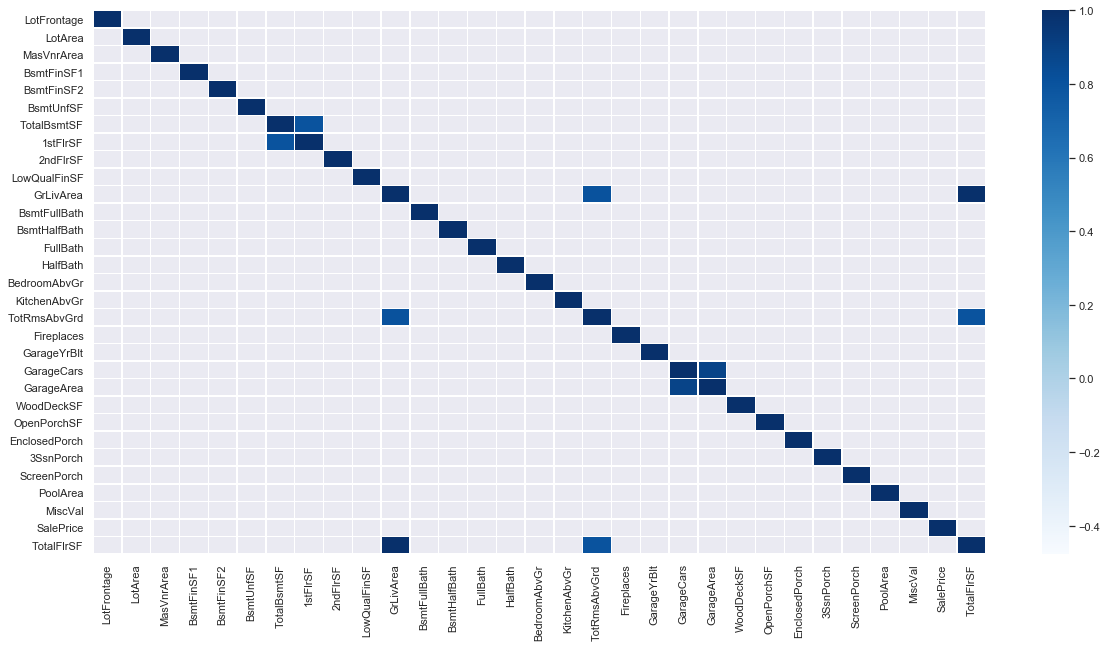

In [23]:
plt.figure(figsize = (20,10))
sns.heatmap(df_all_corr, mask = df_all_corr < 0.75, linewidth = 0.5, cmap = 'Blues')

In [24]:
df_all_corr.SalePrice.sort_values(ascending=False)[1:15]

TotalFlrSF      0.716883
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageYrBlt     0.515297
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
Name: SalePrice, dtype: float64

In [25]:
most_correlated_features = df_all_corr.SalePrice.sort_values(ascending=False)[1:15].index

# Identificando variáveis categóricas e numéricas

In [26]:
features_categoricas = [f for f in df_all.columns if df_all[f].dtype == 'object']
print(features_categoricas)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [27]:
features_numericas = [f for f in df_all.columns if df_all[f].dtype == 'int64' or f == 'float64']
print(features_numericas)

['LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalFlrSF']


In [28]:
features_numericas.pop(1) #1stFlrSF
features_numericas.pop(1) #2ndFlrSF

print(features_numericas)

['LotArea', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalFlrSF']


# Verificando a quantidade de valores diferentes por feature

In [29]:
for f in df_all[features_categoricas].columns:
    print(f'{f} - {len(df_all[f].unique())}')

MSSubClass - 16
MSZoning - 5
Street - 2
Alley - 3
LotShape - 4
LandContour - 4
Utilities - 2
LotConfig - 5
LandSlope - 3
Neighborhood - 25
Condition1 - 9
Condition2 - 8
BldgType - 5
HouseStyle - 8
OverallQual - 3
OverallCond - 3
RoofStyle - 6
RoofMatl - 8
Exterior1st - 15
Exterior2nd - 16
MasVnrType - 4
ExterQual - 4
ExterCond - 5
Foundation - 6
BsmtQual - 5
BsmtCond - 5
BsmtExposure - 5
BsmtFinType1 - 7
BsmtFinType2 - 7
Heating - 6
HeatingQC - 5
CentralAir - 2
Electrical - 5
KitchenQual - 4
Functional - 7
FireplaceQu - 6
GarageType - 7
GarageFinish - 4
GarageQual - 6
GarageCond - 6
PavedDrive - 3
PoolQC - 4
Fence - 5
MiscFeature - 5
SaleType - 9
SaleCondition - 6


# Criando dummies para as variáveis categóricas

In [30]:
df_model = df_all[features_numericas]

In [31]:
def gerar_dummies(df, features):
    for feature in features:
        print(f'{feature} adicionando {len(df_all[feature].unique())} colunas')
        df = pd.concat((df,
                        pd.get_dummies(df_all[feature], prefix = feature)),axis=1)
    return df

In [32]:
df_model = gerar_dummies(df_model, features_categoricas)

MSSubClass adicionando 16 colunas
MSZoning adicionando 5 colunas
Street adicionando 2 colunas
Alley adicionando 3 colunas
LotShape adicionando 4 colunas
LandContour adicionando 4 colunas
Utilities adicionando 2 colunas
LotConfig adicionando 5 colunas
LandSlope adicionando 3 colunas
Neighborhood adicionando 25 colunas
Condition1 adicionando 9 colunas
Condition2 adicionando 8 colunas
BldgType adicionando 5 colunas
HouseStyle adicionando 8 colunas
OverallQual adicionando 3 colunas
OverallCond adicionando 3 colunas
RoofStyle adicionando 6 colunas
RoofMatl adicionando 8 colunas
Exterior1st adicionando 15 colunas
Exterior2nd adicionando 16 colunas
MasVnrType adicionando 4 colunas
ExterQual adicionando 4 colunas
ExterCond adicionando 5 colunas
Foundation adicionando 6 colunas
BsmtQual adicionando 5 colunas
BsmtCond adicionando 5 colunas
BsmtExposure adicionando 5 colunas
BsmtFinType1 adicionando 7 colunas
BsmtFinType2 adicionando 7 colunas
Heating adicionando 6 colunas
HeatingQC adicionando 5

In [33]:
len(df_model.columns)

305

# Separando os dados de treino e teste

In [34]:
x_train = df_model.iloc[:indice_train_max,]
y_train = sales_price

x_test = df_model.iloc[indice_train_max:,]

In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Treinando o modelo

In [37]:
gbr = GradientBoostingRegressor(random_state=0, criterion='friedman_mse', loss='huber')

In [38]:
gbr.fit(x_train_scaled, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
gbr.score(x_train_scaled, y_train)

0.933630957046595

In [40]:
pd.concat((pd.DataFrame(x_train.columns, columns = ['variable']), 
           pd.DataFrame(gbr.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
116,OverallQual_high,0.438458
16,TotalFlrSF,0.173356
174,ExterQual_TA,0.048161
2,GrLivArea,0.036716
0,LotArea,0.036282
203,BsmtFinType1_GLQ,0.027223
251,GarageType_Attchd,0.018010
186,BsmtQual_Ex,0.017766
247,FireplaceQu_NA,0.015877
233,KitchenQual_Ex,0.013281


# Fazendo as predições

In [41]:
y_pred = gbr.predict(x_test_scaled)

In [42]:
prediction_df = pd.DataFrame({
    'Id': x_test.index,
    'SalePrice': y_pred
})

In [43]:
prediction_df

,Id,SalePrice
0,1461,123919.020104
1,1462,160266.591937
2,1463,196706.873316
3,1464,188894.485088
4,1465,191752.982831
...,...,...
1454,2915,89566.079927
1455,2916,89522.898961
1456,2917,141442.638850
1457,2918,123046.151412


# Arquivo de saída

In [44]:
saida = '../data/output/submission.csv'

In [45]:
prediction_df.to_csv(saida, index=False)

print(f'File {saida} generated')

File ../data/output/submission.csv generated


# Pontuação

Score: 0.14597

Pos: 2598